In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("xAPI-Edu-Data.csv")
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


### Men vs Women

In [3]:
women_df = df[(df["gender"] == "F")]
men_df = df[(df["gender"] == "M")]

women_H = women_df[(women_df["Class"] == "H")]
women_M = women_df[(women_df["Class"] == "M")]
women_L = women_df[(women_df["Class"] == "L")]

men_H = men_df[(men_df["Class"] == "H")]
men_M = men_df[(men_df["Class"] == "M")]
men_L = men_df[(men_df["Class"] == "L")]

men_class = len(men_H) / len(men_df), len(men_M) / len(men_df), len(men_L) / len(men_df)
women_class = len(women_H) / len(women_df), len(women_M) / len(women_df), len(women_L) / len(women_df)

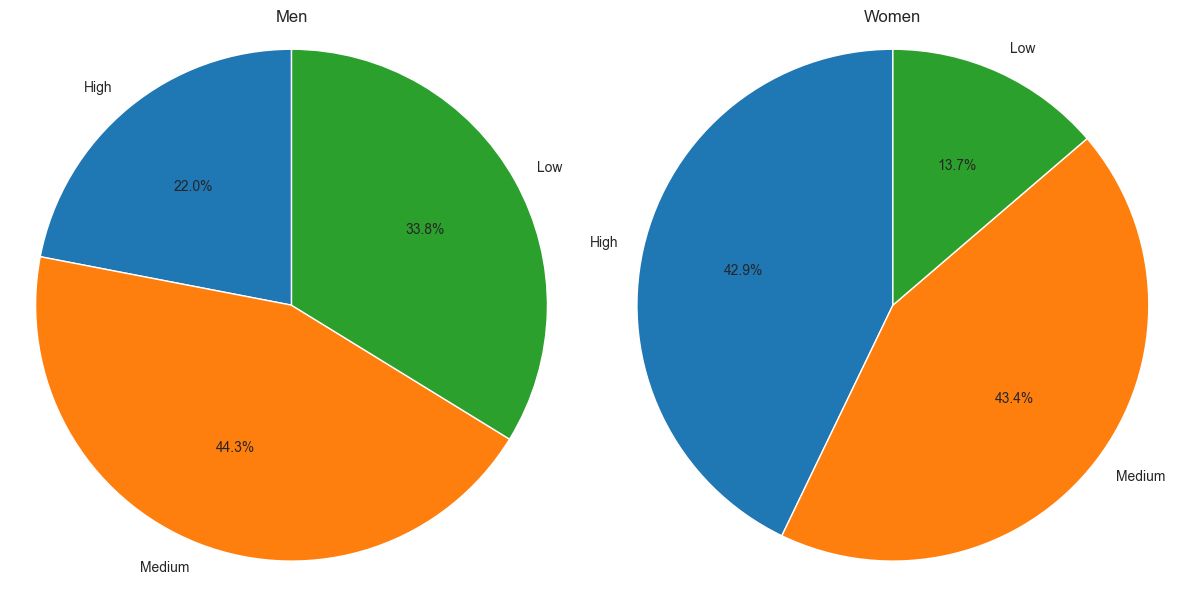

In [4]:
labels = ['High', 'Medium', 'Low']

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].pie(men_class, labels=labels, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Men')

axs[1].pie(women_class, labels=labels, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Women')

for ax in axs:
    ax.axis('equal')

plt.tight_layout()
plt.show()

### How nationality / place of birth depends on performance

In [5]:
nationalities = list(set(df.NationalITy))
places_of_birth = list(set(df.PlaceofBirth))
print(f"Nationalities: {nationalities}")
print(f"Places of birth: {places_of_birth}")

Nationalities: ['Syria', 'Egypt', 'Lybia', 'Morocco', 'venzuela', 'SaudiArabia', 'USA', 'lebanon', 'Jordan', 'Tunis', 'Palestine', 'KW', 'Iraq', 'Iran']
Places of birth: ['Syria', 'Egypt', 'Lybia', 'Morocco', 'venzuela', 'SaudiArabia', 'KuwaIT', 'USA', 'lebanon', 'Jordan', 'Tunis', 'Palestine', 'Iraq', 'Iran']


In [6]:
class_on_nationality_dict = {}
for nationality in nationalities:
    nationality_df = df[(df["NationalITy"] == nationality)]
    L_df = df[(df["NationalITy"] == nationality) & (df["Class"] == "L")]
    M_df = df[(df["NationalITy"] == nationality) & (df["Class"] == "M")]
    H_df = df[(df["NationalITy"] == nationality) & (df["Class"] == "H")]
    
    class_on_nationality_dict[nationality] = {
        "H": len(H_df) / len(nationality_df),
        "M": len(M_df) / len(nationality_df),
        "L": len(L_df) / len(nationality_df),
    }
    
class_on_place_of_birth_dict = {}
for place_of_birth in places_of_birth:
    place_of_birth_df = df[(df["PlaceofBirth"] == place_of_birth)]
    L_df = df[(df["PlaceofBirth"] == place_of_birth) & (df["Class"] == "L")]
    M_df = df[(df["PlaceofBirth"] == place_of_birth) & (df["Class"] == "M")]
    H_df = df[(df["PlaceofBirth"] == place_of_birth) & (df["Class"] == "H")]
    
    class_on_place_of_birth_dict[place_of_birth] = {
        "H": len(H_df) / len(place_of_birth_df),
        "M": len(M_df) / len(place_of_birth_df),
        "L": len(L_df) / len(place_of_birth_df),
    }

In [7]:
output_nationality = pd.DataFrame(class_on_nationality_dict).T
output_place_of_birth = pd.DataFrame(class_on_place_of_birth_dict).T
output_nationality.columns = ['High', 'Medium', 'Low']
output_place_of_birth.columns = ['High', 'Medium', 'Low']
print(f"Nationality:\n{output_nationality}\n\n\nPlace of birth:\n{output_place_of_birth}")

Nationality:
                 High    Medium       Low
Syria        0.285714  0.428571  0.285714
Egypt        0.222222  0.444444  0.333333
Lybia        0.000000  0.000000  1.000000
Morocco      0.250000  0.500000  0.250000
venzuela     1.000000  0.000000  0.000000
SaudiArabia  0.545455  0.363636  0.090909
USA          0.500000  0.333333  0.166667
lebanon      0.529412  0.352941  0.117647
Jordan       0.308140  0.476744  0.215116
Tunis        0.250000  0.416667  0.333333
Palestine    0.428571  0.571429  0.000000
KW           0.201117  0.418994  0.379888
Iraq         0.636364  0.363636  0.000000
Iran         0.000000  0.666667  0.333333


Place of birth:
                 High    Medium       Low
Syria        0.333333  0.500000  0.166667
Egypt        0.333333  0.333333  0.333333
Lybia        0.000000  0.000000  1.000000
Morocco      0.250000  0.500000  0.250000
venzuela     1.000000  0.000000  0.000000
SaudiArabia  0.437500  0.312500  0.250000
KuwaIT       0.194444  0.422222  0.383333
USA

### StageID influences performance

In [8]:
stage_dictionary = {
    "Primary school": {
        "H": len(df[(df["StageID"] == "lowerlevel") & (df["Class"] == "H")]),
        "M": len(df[(df["StageID"] == "lowerlevel") & (df["Class"] == "M")]),
        "L": len(df[(df["StageID"] == "lowerlevel") & (df["Class"] == "L")]),
    },
    "Middle school": {
        "H": len(df[(df["StageID"] == "MiddleSchool") & (df["Class"] == "H")]),
        "M": len(df[(df["StageID"] == "MiddleSchool") & (df["Class"] == "M")]),
        "L": len(df[(df["StageID"] == "MiddleSchool") & (df["Class"] == "L")]),
    },
    "High school": {
        "H": len(df[(df["StageID"] == "HighSchool") & (df["Class"] == "H")]),
        "M": len(df[(df["StageID"] == "HighSchool") & (df["Class"] == "M")]),
        "L": len(df[(df["StageID"] == "HighSchool") & (df["Class"] == "L")]),
    }
}

for key, value in stage_dictionary.items():
    if key == "Primary school":
        for key_x, value_x in stage_dictionary[key].items():
            stage_dictionary[key][key_x] /= len(df[(df["StageID"] == "lowerlevel")])
    elif key == "Middle school":
        for key_x, value_x in stage_dictionary[key].items():
            stage_dictionary[key][key_x] /= len(df[(df["StageID"] == "MiddleSchool")])
    elif key == "High school":
        for key_x, value_x in stage_dictionary[key].items():
            stage_dictionary[key][key_x] /= len(df[(df["StageID"] == "HighSchool")])
    else:
        print("WARNING: Unknown StageID")

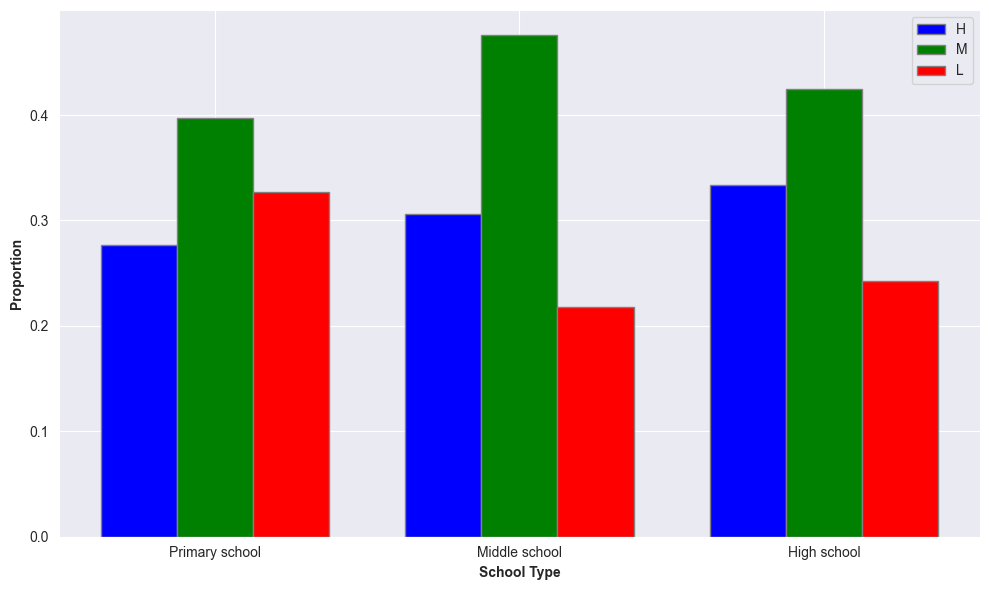

In [9]:
categories = list(stage_dictionary.keys())
H_values = [stage_dictionary[category]['H'] for category in categories]
M_values = [stage_dictionary[category]['M'] for category in categories]
L_values = [stage_dictionary[category]['L'] for category in categories]

bar_width = 0.25
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(10, 6))
plt.bar(r1, H_values, color='b', width=bar_width, edgecolor='grey', label='H')
plt.bar(r2, M_values, color='g', width=bar_width, edgecolor='grey', label='M')
plt.bar(r3, L_values, color='r', width=bar_width, edgecolor='grey', label='L')

plt.xlabel('School Type', fontweight='bold')
plt.ylabel('Proportion', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(categories))], categories)

plt.legend()
plt.tight_layout()
plt.show()

### Absence days influences performance

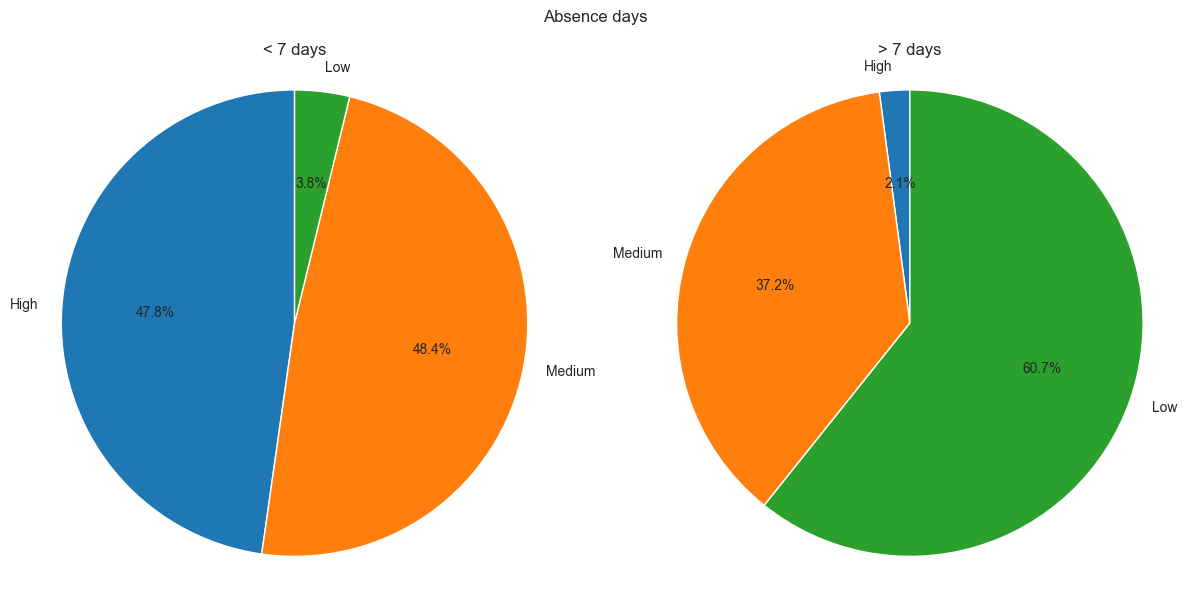

In [10]:
under7 = df[df['StudentAbsenceDays'] == 'Under-7']
above7 = df[df['StudentAbsenceDays'] == 'Above-7']

under7_H = under7[(under7["Class"] == "H")]
under7_M = under7[(under7["Class"] == "M")]
under7_L = under7[(under7["Class"] == "L")]

above7_H = above7[(above7["Class"] == "H")]
above7_M = above7[(above7["Class"] == "M")]
above7_L = above7[(above7["Class"] == "L")]

under7_class = len(under7_H) / len(under7), len(under7_M) / len(under7), len(under7_L) / len(under7)
above7_class = len(above7_H) / len(above7), len(above7_M) / len(above7), len(above7_L) / len(above7)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].pie(under7_class, labels=labels, autopct='%1.1f%%', startangle=90)
axs[0].set_title('< 7 days')

axs[1].pie(above7_class, labels=labels, autopct='%1.1f%%', startangle=90)
axs[1].set_title('> 7 days')

fig.suptitle('Absence days')

for ax in axs:
    ax.axis('equal')

plt.tight_layout()
plt.show()

### Parents' survey influence on academic performance

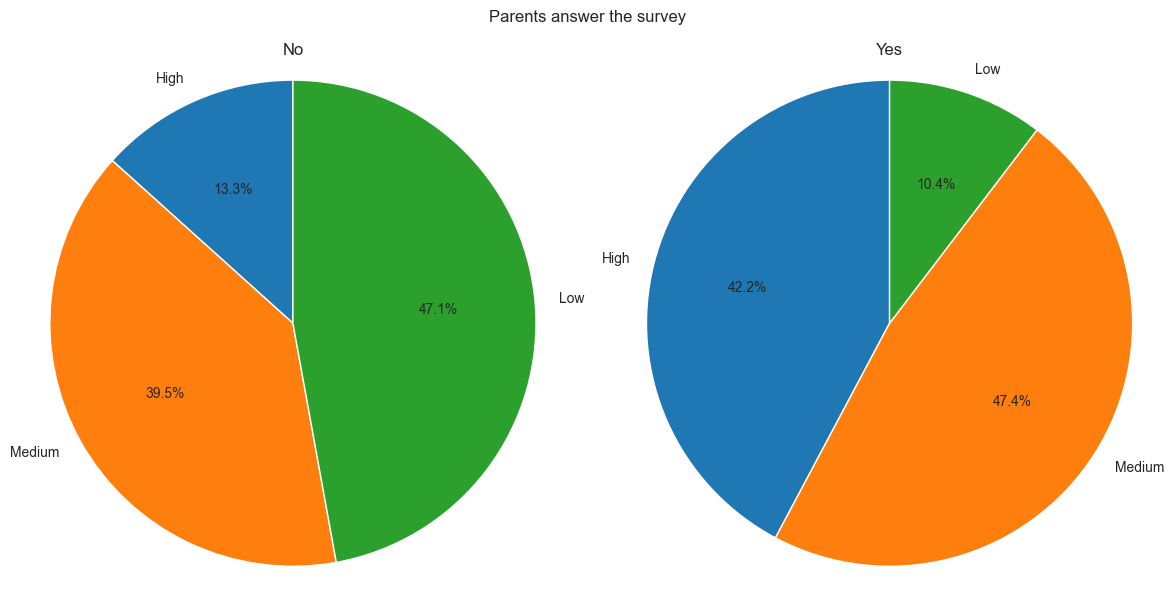

In [11]:
parent_satisfied_no = df[df['ParentAnsweringSurvey'] == 'No']
parent_satisfied_yes = df[df['ParentAnsweringSurvey'] == 'Yes']

parent_satisfied_no_H = parent_satisfied_no[(parent_satisfied_no["Class"] == "H")]
parent_satisfied_no_M = parent_satisfied_no[(parent_satisfied_no["Class"] == "M")]
parent_satisfied_no_L = parent_satisfied_no[(parent_satisfied_no["Class"] == "L")]

parent_satisfied_yes_H = parent_satisfied_yes[(parent_satisfied_yes["Class"] == "H")]
parent_satisfied_yes_M = parent_satisfied_yes[(parent_satisfied_yes["Class"] == "M")]
parent_satisfied_yes_L = parent_satisfied_yes[(parent_satisfied_yes["Class"] == "L")]

parent_satisfied_no_class = (
    len(parent_satisfied_no_H) / len(parent_satisfied_no),
    len(parent_satisfied_no_M) / len(parent_satisfied_no),
    len(parent_satisfied_no_L) / len(parent_satisfied_no)
)

parent_satisfied_yes_class = (
    len(parent_satisfied_yes_H) / len(parent_satisfied_yes),
    len(parent_satisfied_yes_M) / len(parent_satisfied_yes),
    len(parent_satisfied_yes_L) / len(parent_satisfied_yes)
)


fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].pie(parent_satisfied_no_class, labels=labels, autopct='%1.1f%%', startangle=90)
axs[0].set_title('No')

axs[1].pie(parent_satisfied_yes_class, labels=labels, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Yes')

fig.suptitle('Parents answer the survey')

for ax in axs:
    ax.axis('equal')

plt.tight_layout()
plt.show()

## Behavioral analysis

In [12]:
labels = ['High', 'Medium', 'Low']
real_labels = ['H', 'M', 'L']
performance_mapping = {r: e for r, e in zip(real_labels, labels)}
formatted_df = df.copy()
formatted_df['Formatted_Class'] = df['Class'].map(performance_mapping)

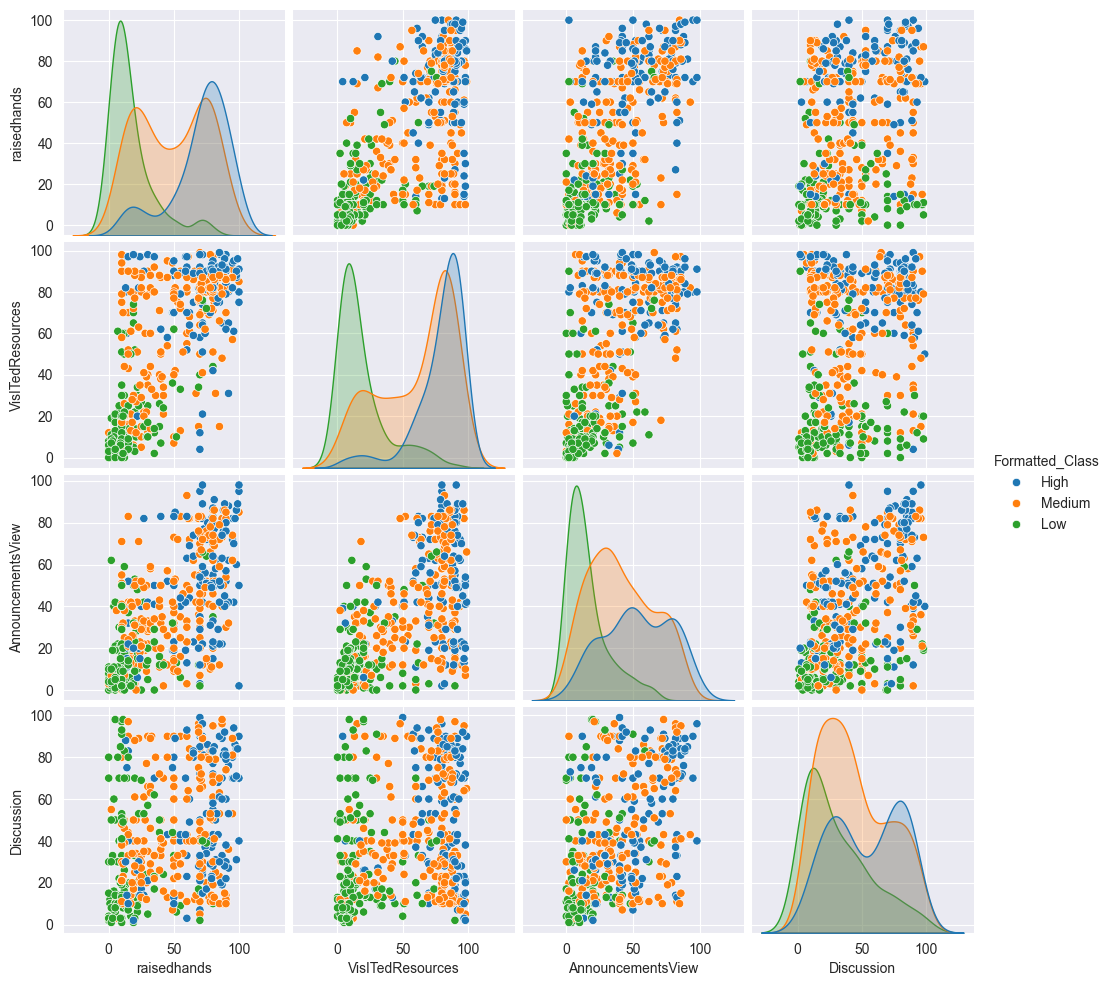

In [13]:
sns.pairplot(data=formatted_df, hue='Formatted_Class', hue_order=labels)

### Performance by participation in discussion groups

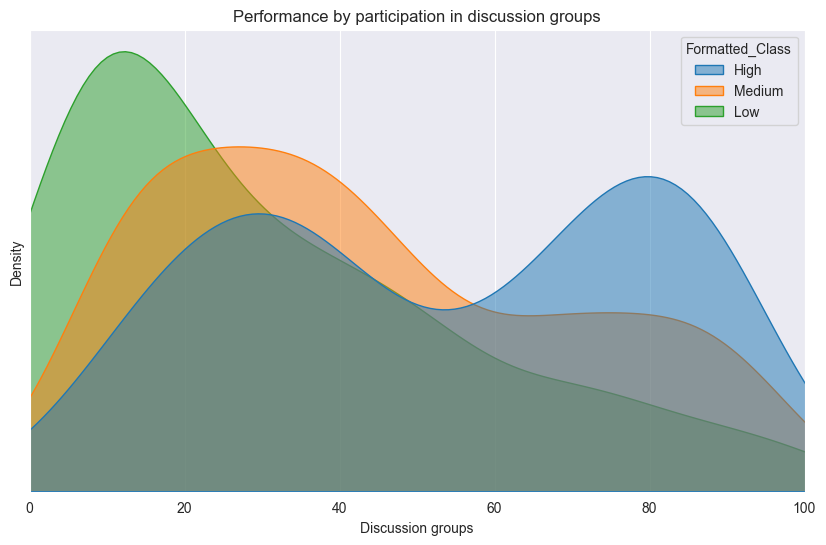

In [14]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=formatted_df, x='Discussion', hue='Formatted_Class', hue_order=labels, fill=True, common_norm=False, alpha=0.5)
plt.title('Performance by participation in discussion groups')
plt.yticks([])
plt.xlim(0, 100)
plt.xlabel('Discussion groups')
plt.ylabel('Density')
plt.show()

### Performance by the amount of announcement views

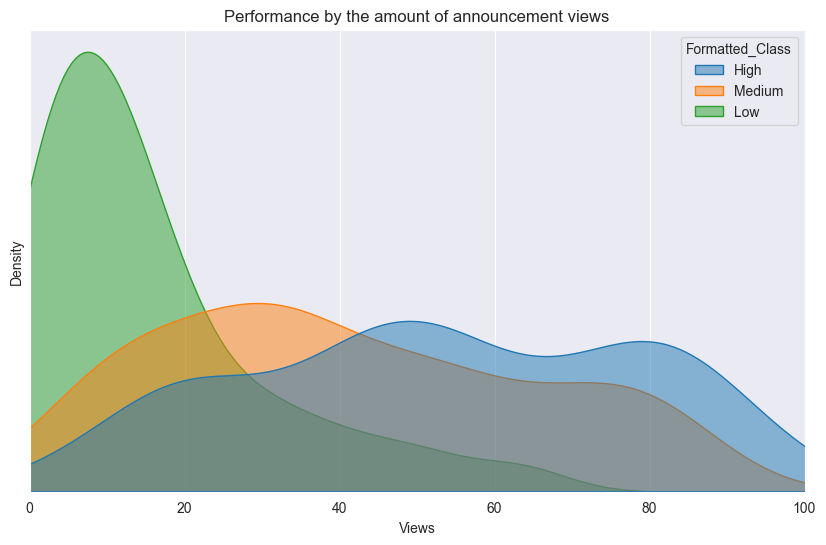

In [15]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=formatted_df, x='AnnouncementsView', hue='Formatted_Class', hue_order=labels, fill=True, common_norm=False, alpha=0.5)
plt.title('Performance by the amount of announcement views')
plt.yticks([])
plt.xlim(0, 100)
plt.xlabel('Views')
plt.ylabel('Density')
plt.show()

### Performance by the amount of visited resources

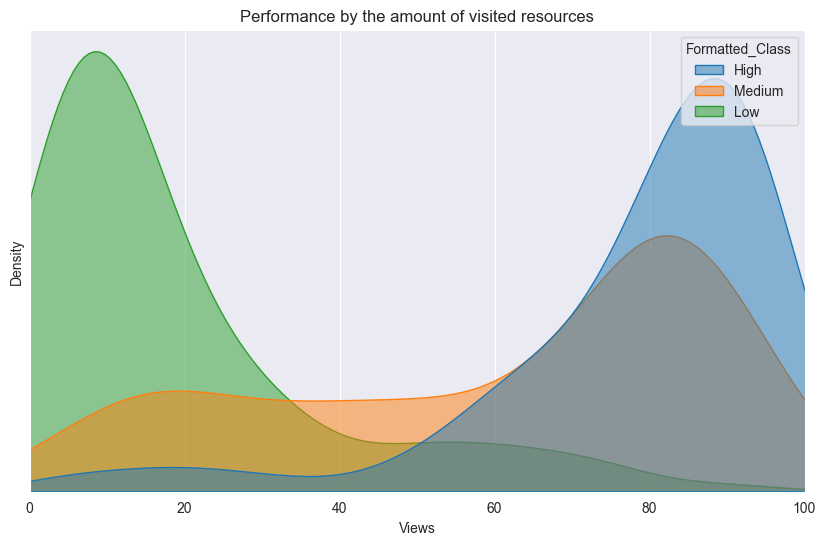

In [16]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=formatted_df, x='VisITedResources', hue='Formatted_Class', fill=True, hue_order=labels, common_norm=False, alpha=0.5)
plt.title('Performance by the amount of visited resources')
plt.yticks([])
plt.xlim(0, 100)
plt.xlabel('Views')
plt.ylabel('Density')
plt.show()

### Performance by the amount of raised hands

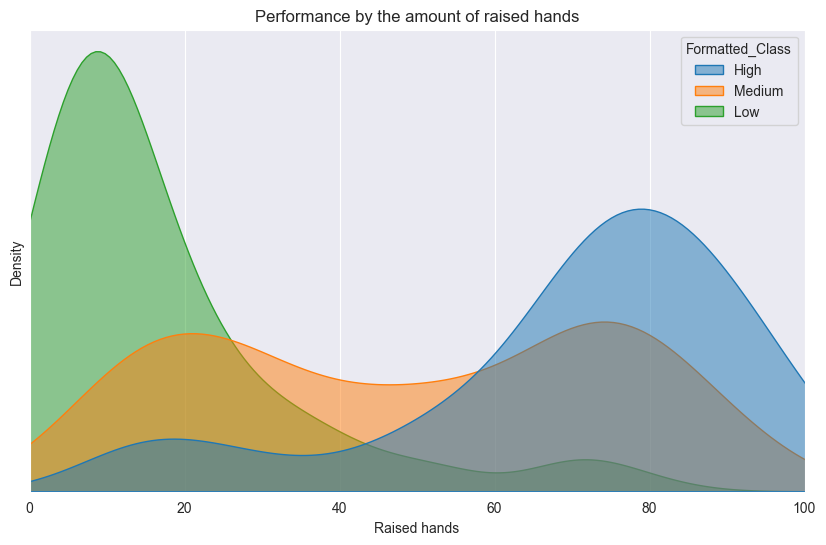

In [17]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=formatted_df, x='raisedhands', hue='Formatted_Class', hue_order=labels, fill=True, common_norm=False, alpha=0.5)
plt.title('Performance by the amount of raised hands')
plt.yticks([])
plt.xlim(0, 100)
plt.xlabel('Raised hands')
plt.ylabel('Density')
plt.show()

## General attributes

### Parents' school satisfaction

In [18]:
parents_satisfaction_dictionary = {
    "Good": {
        "H": len(df[(df["ParentschoolSatisfaction"] == "Good") & (df["Class"] == "H")]),
        "M": len(df[(df["ParentschoolSatisfaction"] == "Good") & (df["Class"] == "M")]),
        "L": len(df[(df["ParentschoolSatisfaction"] == "Good") & (df["Class"] == "L")]),
    },
    "Bad": {
        "H": len(df[(df["ParentschoolSatisfaction"] == "Bad") & (df["Class"] == "H")]),
        "M": len(df[(df["ParentschoolSatisfaction"] == "Bad") & (df["Class"] == "M")]),
        "L": len(df[(df["ParentschoolSatisfaction"] == "Bad") & (df["Class"] == "L")]),
    }
}

for key, value in parents_satisfaction_dictionary.items():
    if key == "Good":
        for key_x, value_x in parents_satisfaction_dictionary[key].items():
            parents_satisfaction_dictionary[key][key_x] /= len(df[(df["ParentschoolSatisfaction"] == "Good")])
    elif key == "Bad":
        for key_x, value_x in parents_satisfaction_dictionary[key].items():
            parents_satisfaction_dictionary[key][key_x] /= len(df[(df["ParentschoolSatisfaction"] == "Bad")])
    else:
        print("WARNING: Unknown parents satisfaction:", key)

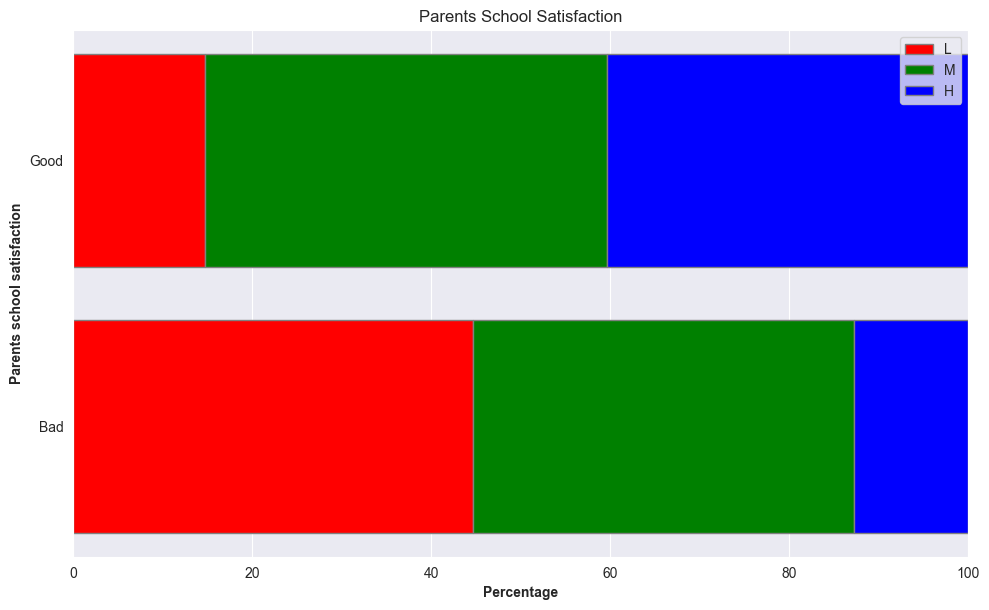

In [19]:
# Extract categories and values
categories = list(parents_satisfaction_dictionary.keys())
H_values = [parents_satisfaction_dictionary[category]['H'] for category in categories]
M_values = [parents_satisfaction_dictionary[category]['M'] for category in categories]
L_values = [parents_satisfaction_dictionary[category]['L'] for category in categories]

# Calculate total values for each category
totals = [H + M + L for H, M, L in zip(H_values, M_values, L_values)]

# Combine categories with their total values and sort by total values (descending)
sorted_data = sorted(zip(categories, H_values, M_values, L_values, totals), key=lambda x: x[4], reverse=True)

# Reverse the sorted data to have good on top and bad at the bottom
sorted_data.reverse()

# Unzip sorted data
categories, H_values, M_values, L_values, _ = zip(*sorted_data)

# Calculate percentages
totals = [H + M + L for H, M, L in zip(H_values, M_values, L_values)]
H_percent = [H / total * 100 for H, total in zip(H_values, totals)]
M_percent = [M / total * 100 for M, total in zip(M_values, totals)]
L_percent = [L / total * 100 for L, total in zip(L_values, totals)]

# Plotting
bar_width = 0.5
r1 = np.arange(len(categories))

plt.figure(figsize=(10, 6))

# Stack the bars from low to high
plt.barh(r1, L_percent, color='r', edgecolor='grey', label='L')
plt.barh(r1, M_percent, left=L_percent, color='g', edgecolor='grey', label='M')
plt.barh(r1, H_percent, left=[i + j for i, j in zip(L_percent, M_percent)], color='b', edgecolor='grey', label='H')

# Add labels and title
plt.xlabel('Percentage', fontweight='bold')
plt.ylabel('Parents school satisfaction', fontweight='bold')
plt.yticks(r1, categories)
plt.xlim(0, 100)

# Add legend
plt.legend()
plt.tight_layout()
plt.title('Parents School Satisfaction')
plt.show()

### On which semester pupils learn better?

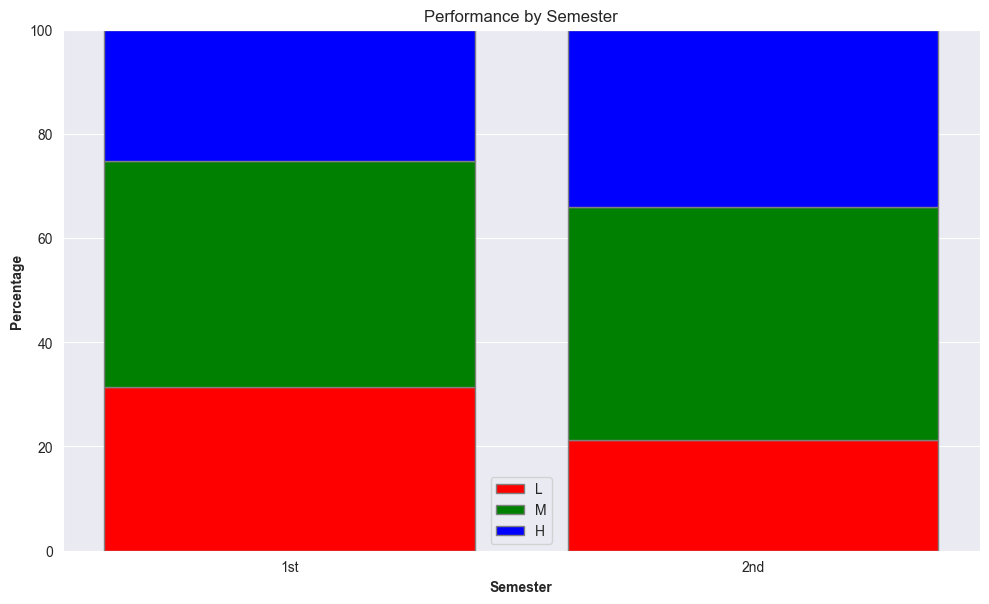

In [20]:
# Create a dictionary to store the counts
semester_performance_dictionary = {
    "F": {
        "H": len(df[(df["Semester"] == "F") & (df["Class"] == "H")]),
        "M": len(df[(df["Semester"] == "F") & (df["Class"] == "M")]),
        "L": len(df[(df["Semester"] == "F") & (df["Class"] == "L")]),
    },
    "S": {
        "H": len(df[(df["Semester"] == "S") & (df["Class"] == "H")]),
        "M": len(df[(df["Semester"] == "S") & (df["Class"] == "M")]),
        "L": len(df[(df["Semester"] == "S") & (df["Class"] == "L")]),
    }
}

# Calculate percentages
for key in semester_performance_dictionary:
    total = sum(semester_performance_dictionary[key].values())
    for key_x in semester_performance_dictionary[key]:
        semester_performance_dictionary[key][key_x] /= total

# Extract categories and values
categories = list(semester_performance_dictionary.keys())
H_values = [semester_performance_dictionary[category]['H'] for category in categories]
M_values = [semester_performance_dictionary[category]['M'] for category in categories]
L_values = [semester_performance_dictionary[category]['L'] for category in categories]

# Combine categories with their total values and sort by total values (descending)
totals = [H + M + L for H, M, L in zip(H_values, M_values, L_values)]
sorted_data = sorted(zip(categories, H_values, M_values, L_values, totals), key=lambda x: x[4], reverse=True)

# Unzip sorted data
categories, H_values, M_values, L_values, _ = zip(*sorted_data)

# Calculate percentages for plotting
totals = [H + M + L for H, M, L in zip(H_values, M_values, L_values)]
H_percent = [H * 100 for H in H_values]
M_percent = [M * 100 for M in M_values]
L_percent = [L * 100 for L in L_values]

# Plotting
bar_width = 0.5
r1 = np.arange(len(categories))

plt.figure(figsize=(10, 6))

# Stack the bars from low to high
plt.bar(r1, L_percent, color='r', edgecolor='grey', label='L')
plt.bar(r1, M_percent, bottom=L_percent, color='g', edgecolor='grey', label='M')
plt.bar(r1, H_percent, bottom=[i + j for i, j in zip(L_percent, M_percent)], color='b', edgecolor='grey', label='H')

# Add labels and title
plt.xlabel('Semester', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(r1, ['1st', '2nd'])
plt.ylim(0, 100)

# Add legend
plt.legend()
plt.tight_layout()
plt.title('Performance by Semester')
plt.show()

### Performance depending on the parent responsible for the student

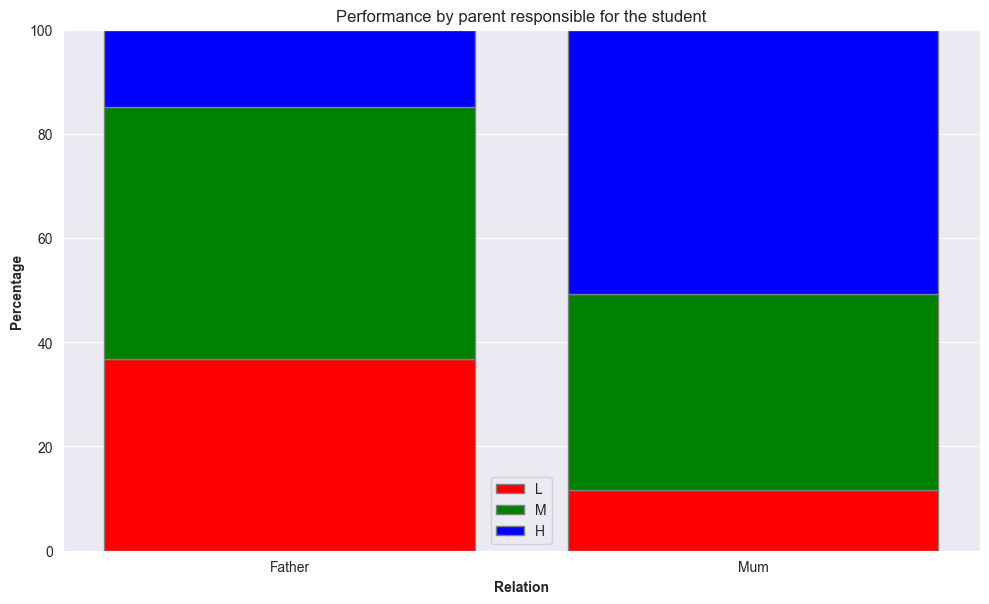

In [21]:
# Create a dictionary to store the counts
relation_performance_dictionary = {
    "Father": {
        "H": len(df[(df["Relation"] == "Father") & (df["Class"] == "H")]),
        "M": len(df[(df["Relation"] == "Father") & (df["Class"] == "M")]),
        "L": len(df[(df["Relation"] == "Father") & (df["Class"] == "L")]),
    },
    "Mum": {
        "H": len(df[(df["Relation"] == "Mum") & (df["Class"] == "H")]),
        "M": len(df[(df["Relation"] == "Mum") & (df["Class"] == "M")]),
        "L": len(df[(df["Relation"] == "Mum") & (df["Class"] == "L")]),
    }
}

# Calculate percentages
for key in relation_performance_dictionary:
    total = sum(relation_performance_dictionary[key].values())
    for key_x in relation_performance_dictionary[key]:
        relation_performance_dictionary[key][key_x] /= total

# Extract categories and values
categories = list(relation_performance_dictionary.keys())
H_values = [relation_performance_dictionary[category]['H'] for category in categories]
M_values = [relation_performance_dictionary[category]['M'] for category in categories]
L_values = [relation_performance_dictionary[category]['L'] for category in categories]

# Combine categories with their total values and sort by total values (descending)
totals = [H + M + L for H, M, L in zip(H_values, M_values, L_values)]
sorted_data = sorted(zip(categories, H_values, M_values, L_values, totals), key=lambda x: x[4], reverse=True)

# Unzip sorted data
categories, H_values, M_values, L_values, _ = zip(*sorted_data)

# Calculate percentages for plotting
H_percent = [H * 100 for H in H_values]
M_percent = [M * 100 for M in M_values]
L_percent = [L * 100 for L in L_values]

# Plotting
bar_width = 0.5
r1 = np.arange(len(categories))

plt.figure(figsize=(10, 6))

# Stack the bars from low to high
plt.bar(r1, L_percent, color='r', edgecolor='grey', label='L')
plt.bar(r1, M_percent, bottom=L_percent, color='g', edgecolor='grey', label='M')
plt.bar(r1, H_percent, bottom=[i + j for i, j in zip(L_percent, M_percent)], color='b', edgecolor='grey', label='H')

# Add labels and title
plt.xlabel('Relation', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(r1, categories)
plt.ylim(0, 100)

# Add legend
plt.legend()
plt.tight_layout()
plt.title('Performance by parent responsible for the student')
plt.show()


### Performance by the topic learned

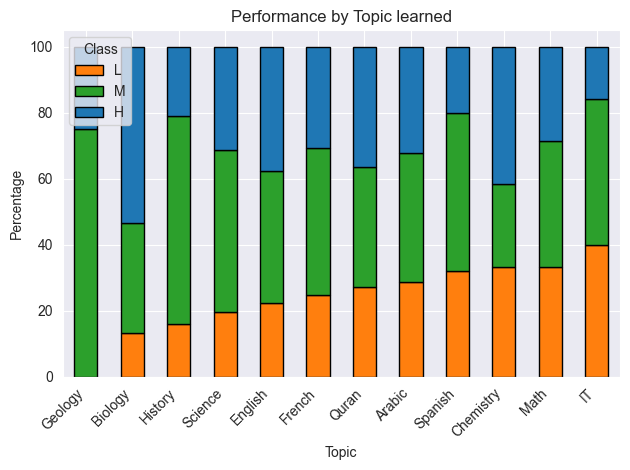

In [29]:
# Count occurrences of each class within each topic
topic_performance = df.groupby(['Topic', 'Class']).size().unstack(fill_value=0)

# Calculate percentages
topic_performance_percent = topic_performance.div(topic_performance.sum(axis=1), axis=0) * 100

# Ensure the columns are in the order L, M, H
topic_performance_percent = topic_performance_percent[['L', 'M', 'H']]

# Sort the DataFrame by the 'L' column in increasing order
topic_performance_percent = topic_performance_percent.sort_values(by='L')

topic_performance_percent.plot(kind='bar', stacked=True, color=['#ff7f0e', '#2ca02c', '#1f77b4'], edgecolor='black')

# Add labels and title
plt.xlabel('Topic')
plt.ylabel('Percentage')
plt.title('Performance by Topic learned')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Class')
plt.tight_layout()

# Show the plot
plt.show()

### Letter of the class student is learning at

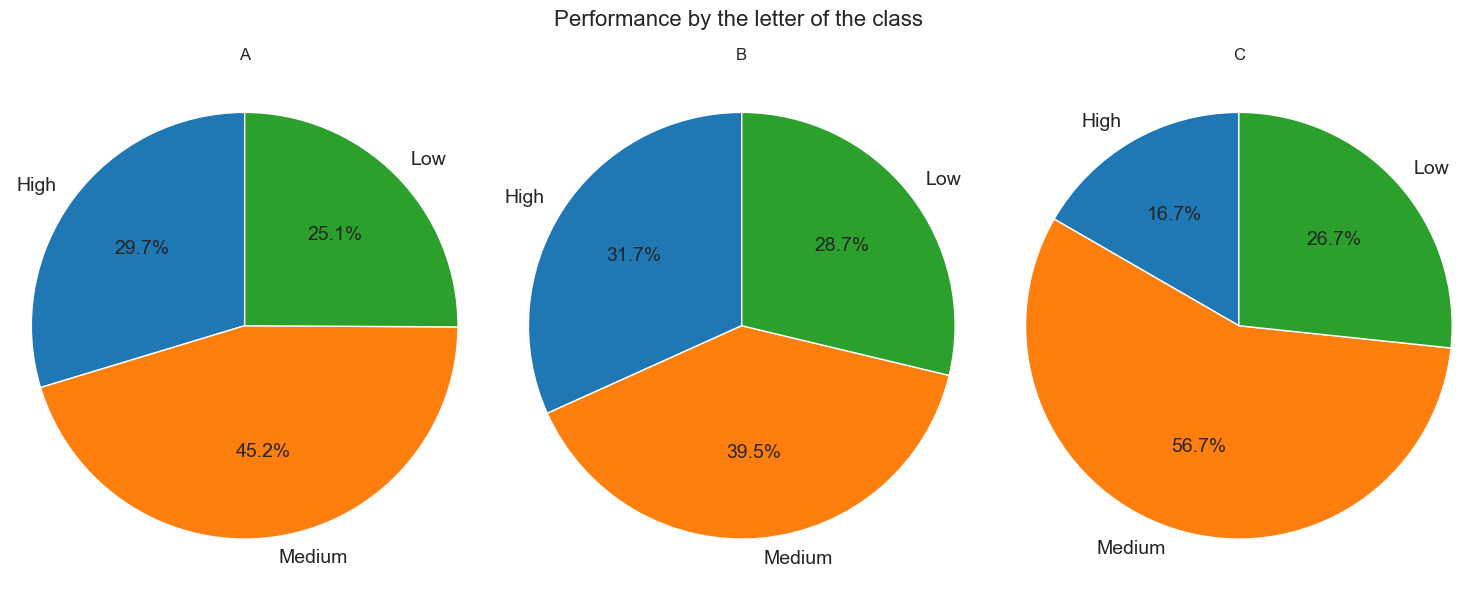

In [46]:
class_a = df[df['SectionID'] == 'A']
class_b = df[df['SectionID'] == 'B']
class_c = df[df['SectionID'] == 'C']

class_a_H = class_a[(class_a["Class"] == "H")]
class_a_M = class_a[(class_a["Class"] == "M")]
class_a_L = class_a[(class_a["Class"] == "L")]

class_b_H = class_b[(class_b["Class"] == "H")]
class_b_M = class_b[(class_b["Class"] == "M")]
class_b_L = class_b[(class_b["Class"] == "L")]

class_c_H = class_c[(class_c["Class"] == "H")]
class_c_M = class_c[(class_c["Class"] == "M")]
class_c_L = class_c[(class_c["Class"] == "L")]

class_a_class = (
    len(class_a_H) / len(class_a),
    len(class_a_M) / len(class_a),
    len(class_a_L) / len(class_a)
)

class_b_class = (
    len(class_b_H) / len(class_b),
    len(class_b_M) / len(class_b),
    len(class_b_L) / len(class_b)
)

class_c_class = (
    len(class_c_H) / len(class_c),
    len(class_c_M) / len(class_c),
    len(class_c_L) / len(class_c)
)


fig, axs = plt.subplots(1, 3, figsize=(15, 6))
axs[0].pie(class_a_class, labels=labels, autopct=lambda pct: f'{pct:.1f}%', startangle=90, textprops={'fontsize': 14})
axs[0].set_title('A')

axs[1].pie(class_b_class, labels=labels, autopct=lambda pct: f'{pct:.1f}%', startangle=90, textprops={'fontsize': 14})
axs[1].set_title('B')

axs[2].pie(class_c_class, labels=labels, autopct=lambda pct: f'{pct:.1f}%', startangle=90, textprops={'fontsize': 14})
axs[2].set_title('C')

fig.suptitle('Performance by the letter of the class', fontsize=16)

for ax in axs:
    ax.axis('equal')

plt.tight_layout()
plt.show()

## Interesting observations from the data

### Activity correlations

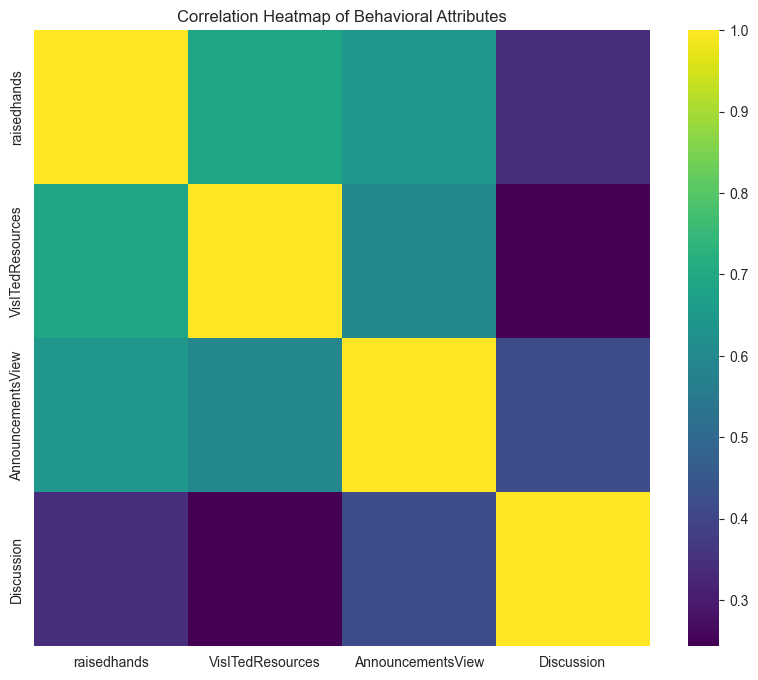

In [54]:
# Select the columns of interest
attributes = ["raisedhands", "VisITedResources", "AnnouncementsView", "Discussion"]

# Calculate the correlation matrix
corr_matrix = df[attributes].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="viridis", fmt=".2f", square=True)
plt.title('Correlation Heatmap of Behavioral Attributes')
plt.show()

### Comparison of parenting

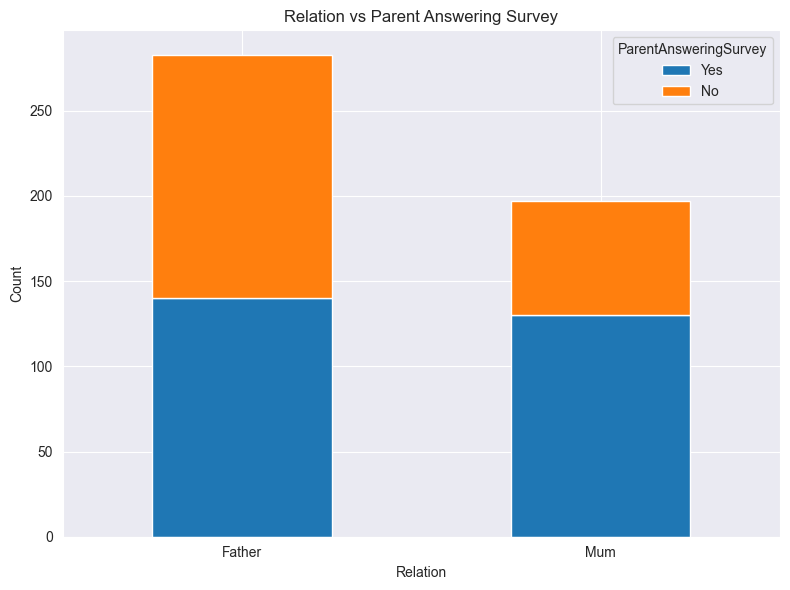

In [57]:
# Create a contingency table
contingency_table = pd.crosstab(df['Relation'], df['ParentAnsweringSurvey'])

# Plot the stacked bar plot with the desired order of bars
contingency_table[['Yes', 'No']].plot(kind='bar', stacked=True, figsize=(8, 6))

# Add labels and title
plt.xlabel('Relation')
plt.ylabel('Count')
plt.title('Relation vs Parent Answering Survey')

# Show the plot
plt.legend(title='ParentAnsweringSurvey')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

As a conclusion we may say that mums (percent-wise) more often answer the surveys than dads.

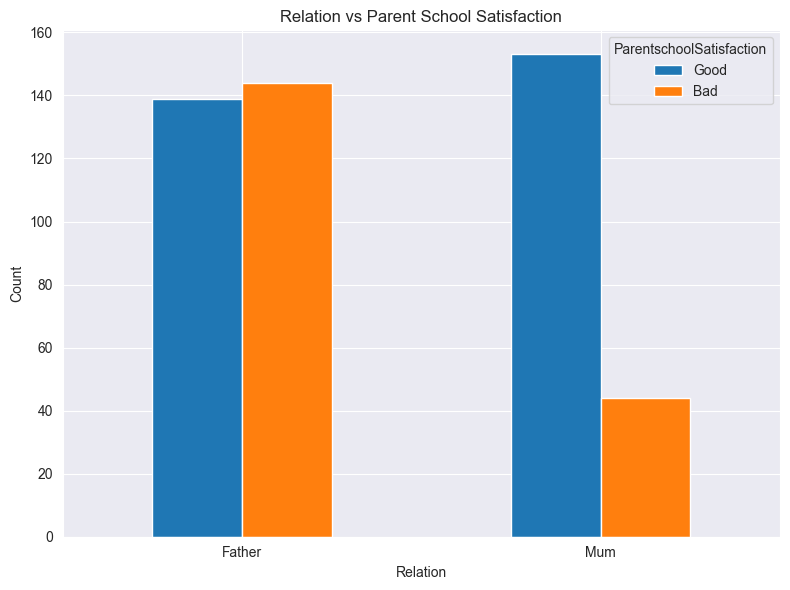

In [59]:
# Create a contingency table
contingency_table = pd.crosstab(df['Relation'], df['ParentschoolSatisfaction'])

# Reorder the columns
contingency_table = contingency_table[['Good', 'Bad']]

# Plot the grouped bar plot
contingency_table.plot(kind='bar', figsize=(8, 6))

# Add labels and title
plt.xlabel('Relation')
plt.ylabel('Count')
plt.title('Relation vs Parent School Satisfaction')

# Show the plot
plt.legend(title='ParentschoolSatisfaction')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

From this graph it seems that either mums are loyal to the schools their children are studying at or they choose better schools for their children at the first place.

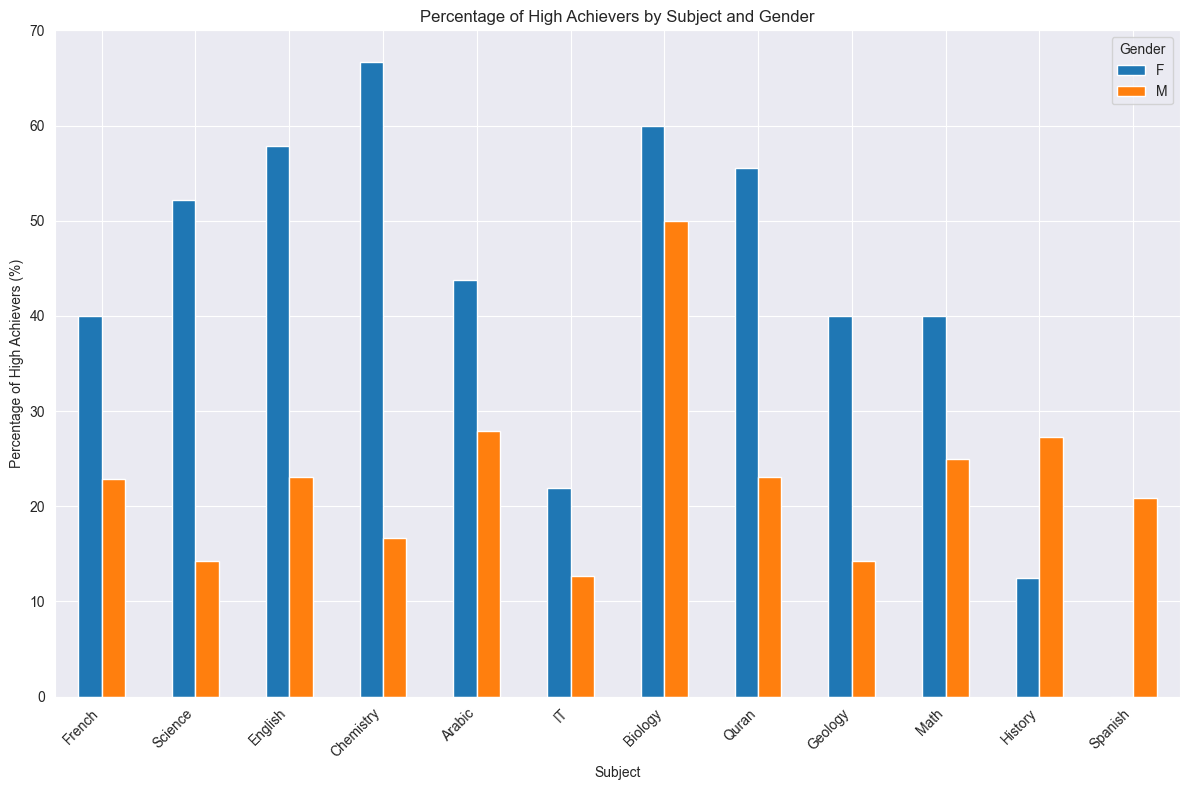

In [74]:
# Filter only 'H' class
df_h = df[df['Class'] == 'H']

# Group by gender and topic, and count the number of 'H' class
h_counts = df_h.groupby(['Topic', 'gender']).size().unstack(fill_value=0)

# Calculate the total count of each gender within each subject
total_gender_counts = df.groupby(['Topic', 'gender']).size().unstack(fill_value=0)

# Calculate the percentage of 'H' class for each subject and gender
h_percentages = (h_counts.div(total_gender_counts) * 100).round(2)

# Calculate the total count of female high achievers for each subject
female_totals = h_counts['F']

# Sort the DataFrame based on female high achievers
h_percentages_sorted = h_percentages.loc[female_totals.sort_values(ascending=False).index]

# Plot the grouped bar plot
h_percentages_sorted.plot(kind='bar', figsize=(12, 8))

# Add labels and title
plt.xlabel('Subject')
plt.ylabel('Percentage of High Achievers (%)')
plt.title('Percentage of High Achievers by Subject and Gender')

# Show the plot
plt.legend(title='Gender')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Female pupils have more high-achievers (percent-wise) for almost all subjects.